In [1]:
import os

In [2]:
import zipfile

In [3]:
from PIL import Image

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Specify the directory where files will be extracted
directory_to_extract_to = 'extracted_images'  # Set your desired folder name

# Extract the zip file
with zipfile.ZipFile('Images.zip', 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

print(f"Files have been extracted to {directory_to_extract_to}")

Files have been extracted to extracted_images


In [6]:
import os

extracted_folder = 'extracted_images'
files = os.listdir(extracted_folder)
print(f"Extracted files: {files}")


Extracted files: ['1a181c81-8386-462a-bbdc-048692f17915.jpeg', '5a99c54c-b151-4bb7-80c6-f637a4044ae3.jpeg', 'e4b9536d-16be-47a5-910e-0e9a8fa34df1.jpeg']


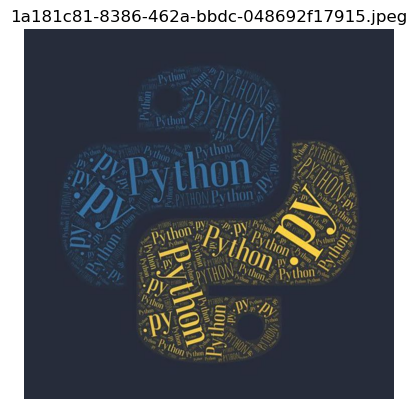

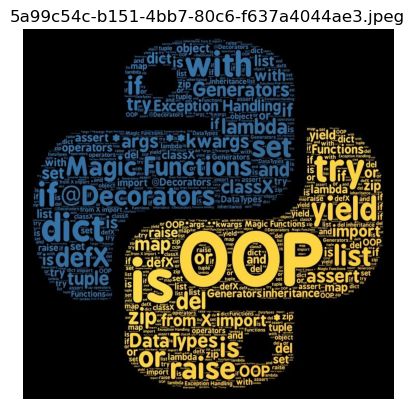

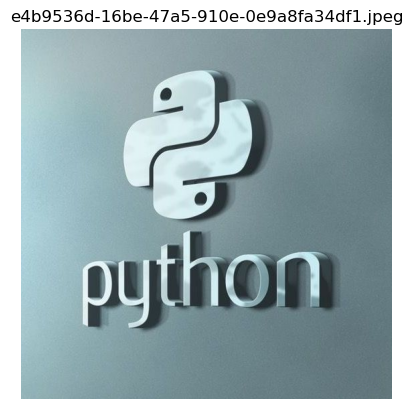

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the extracted folder
extracted_folder = 'extracted_images'

# Display each image
for file_name in os.listdir(extracted_folder):
    if file_name.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif')):  # Supported image formats
        image_path = os.path.join(extracted_folder, file_name)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(file_name)
        plt.show()


In [8]:
img_resized = img.resize((200, 200))
img_resized.save(os.path.join(extracted_folder, f"resized_{file_name}"))


In [9]:
gray_img = img.convert('L')
gray_img.show()


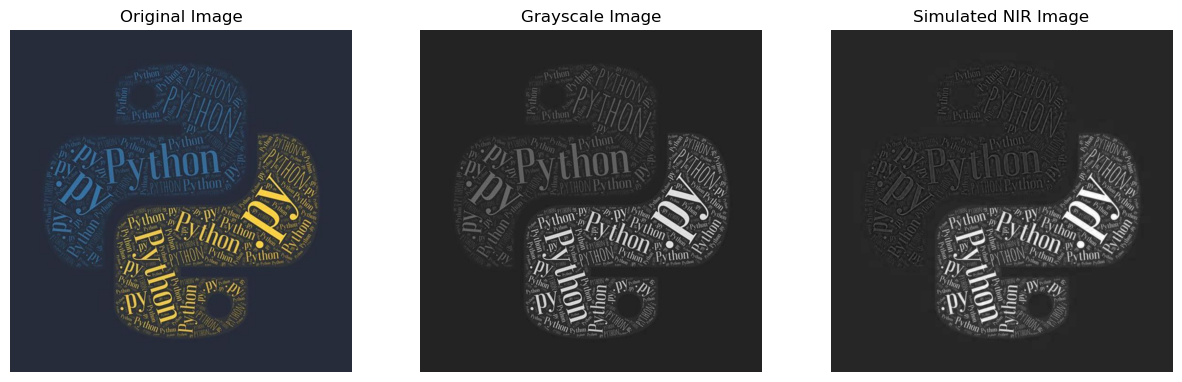

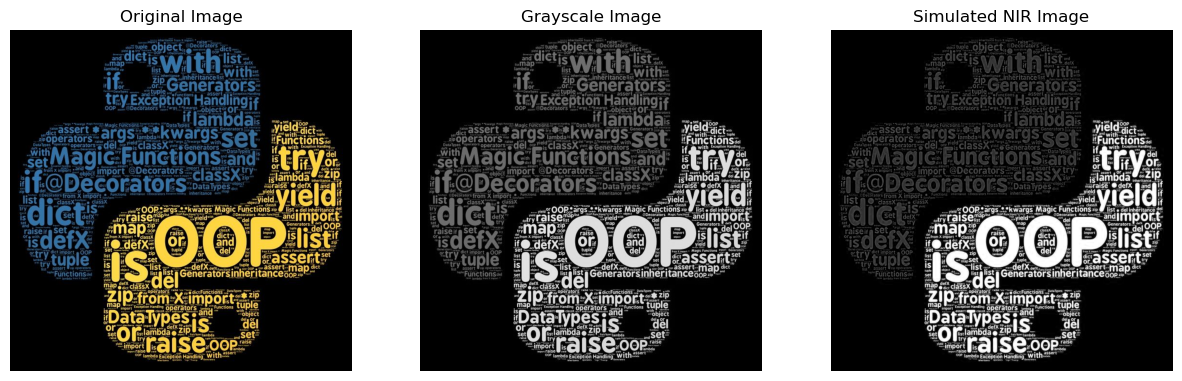

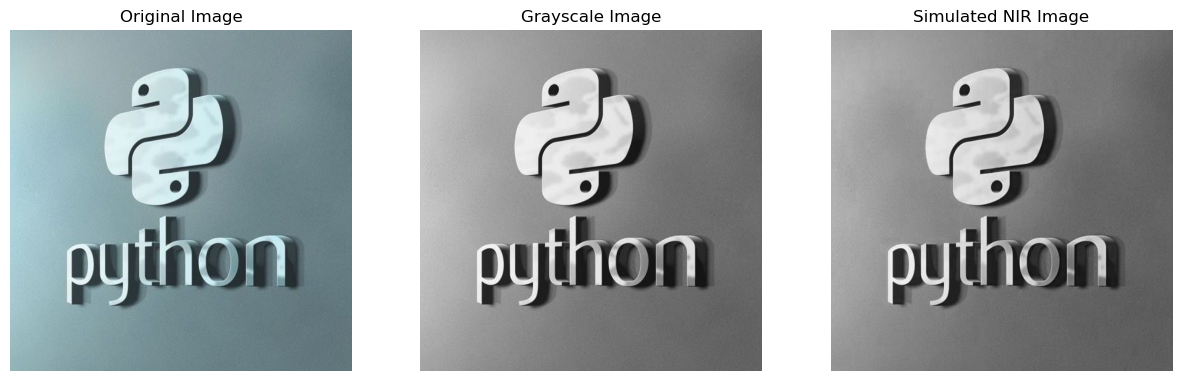

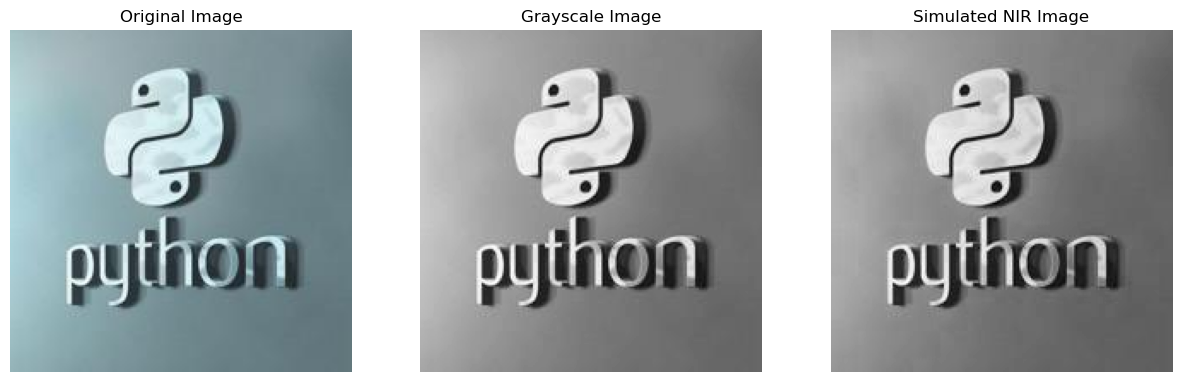

In [10]:
import os
import zipfile
from PIL import Image
import matplotlib.pyplot as plt

def unzip_and_process_images(zip_file_path, extract_to_folder):
    # Check if the zip file exists
    if not os.path.exists(zip_file_path):
        print(f"Error: The file {zip_file_path} does not exist.")
        return

    # Unzip the folder
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_folder)

    # Get list of all image files in the extracted folder
    image_files = [
        os.path.join(extract_to_folder, file)
        for file in os.listdir(extract_to_folder)
        if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))
    ]

    # Check if any images are found
    if not image_files:
        print("No images found in the extracted folder.")
        return

    # Process each image
    for image_file in image_files:
        process_image(image_file)

def process_image(file_path):
    try:
        # Open the image
        img = Image.open(file_path)

        # Convert to grayscale
        grayscale_img = img.convert('L')
        
        # Simulate NIR (for demonstration purposes, using the red channel as a proxy)
        nir_img = img.split()[0]  # Use the red channel as a basic NIR simulation

        # Display the original, grayscale, and simulated NIR images
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Original Image')

        plt.subplot(1, 3, 2)
        plt.imshow(grayscale_img, cmap='gray')
        plt.axis('off')
        plt.title('Grayscale Image')

        plt.subplot(1, 3, 3)
        plt.imshow(nir_img, cmap='gray')
        plt.axis('off')
        plt.title('Simulated NIR Image')

        plt.show()

    except Exception as e:
        print(f"Error processing the image {file_path}: {e}")

# Example usage
# Replace 'images.zip' with the path to your zip file
# Replace 'extracted_images' with the folder where you want to extract images
zip_file_path = 'images.zip'
extract_to_folder = 'extracted_images'

if not os.path.exists(extract_to_folder):
    os.makedirs(extract_to_folder)

unzip_and_process_images(zip_file_path, extract_to_folder)


In [11]:
def process_image(file_path):
    try:
        # Open the image
        img = Image.open(file_path)

        # Convert to grayscale
        grayscale_img = img.convert('L')
        
        # Simulate NIR using a weighted combination of channels (for demonstration)
        r, g, b = img.split()
        nir_simulation = r.point(lambda i: i * 0.8)  # Enhance the red channel as NIR proxy

        # Display the original, grayscale, and simulated NIR images
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Original Image')

        plt.subplot(1, 3, 2)
        plt.imshow(grayscale_img, cmap='gray')
        plt.axis('off')
        plt.title('Grayscale Image')

        plt.subplot(1, 3, 3)
        plt.imshow(nir_simulation, cmap='gray')
        plt.axis('off')
        plt.title('Enhanced NIR Simulation')

        plt.show()

    except Exception as e:
        print(f"Error processing the image {file_path}: {e}")


<>:59: SyntaxWarning: invalid escape sequence '\A'
<>:59: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Hamna Mirza\AppData\Local\Temp\ipykernel_5364\6708261.py:59: SyntaxWarning: invalid escape sequence '\A'
  process_image_with_mask('D:\Artificial Intelligence\Third Semester\Artificial Intelligence\Finals\Lab\Lab Task 9\extracted_images\e4b9536d-16be-47a5-910e-0e9a8fa34df1.jpeg')


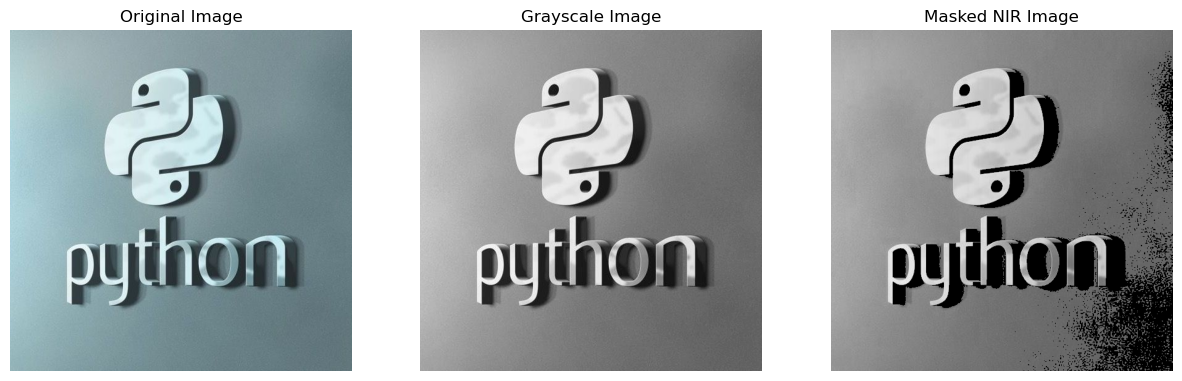

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def process_image_with_mask(file_path):
    try:
        # Open the image
        img = Image.open(file_path)

        # Convert to grayscale
        grayscale_img = img.convert('L')

        # Simulate NIR using the red channel (this is a basic simulation of NIR)
        r, g, b = img.split()
        nir_simulation = Image.merge('RGB', (r, r, r))

        # Convert the simulated NIR image to a numpy array for masking
        nir_array = np.array(nir_simulation)

        # Create a simple mask where pixel values are above a certain threshold
        # For example, let's mask pixels where the NIR value is above 100 (you can adjust this threshold)
        mask = nir_array[:, :, 0] > 100  # Using the red channel (which represents NIR in this case)
        
        # Apply the mask: set all masked areas to black (0,0,0)
        masked_nir = nir_array.copy()
        masked_nir[~mask] = 0  # Set pixels outside the mask to black

        # Convert the masked result back to an image
        masked_nir_image = Image.fromarray(masked_nir)

        # Save the masked NIR image
        masked_nir_image.save('masked_nir_image.jpg')
        grayscale_img.save('grayscale_image.jpg')

        # Display the original, grayscale, and masked NIR images
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Original Image')

        plt.subplot(1, 3, 2)
        plt.imshow(grayscale_img, cmap='gray')
        plt.axis('off')
        plt.title('Grayscale Image')

        plt.subplot(1, 3, 3)
        plt.imshow(masked_nir_image)
        plt.axis('off')
        plt.title('Masked NIR Image')

        plt.show()

    except Exception as e:
        print(f"Error processing the image {file_path}: {e}")

# Example usage - Make sure the image path is correct
process_image_with_mask('D:\Artificial Intelligence\Third Semester\Artificial Intelligence\Finals\Lab\Lab Task 9\extracted_images\e4b9536d-16be-47a5-910e-0e9a8fa34df1.jpeg')
